In [5]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline

In [6]:
def read_data_file(file_path):
    headers = []
    data_blocks = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line:
            header = float(line)
            headers.append(header)

            i += 1
            block_lines = []
            while i < len(lines) and lines[i].strip():
                aux = list(map(float, lines[i].split()))
                # repeat the first element of each line to make the animation periodic
                aux.append(aux[0])
                block_lines.append(aux)
                i += 1
            # repeat the first line to make the animation periodic
            block_lines.append(block_lines[0])
            data_block = np.array(block_lines)
            data_blocks.append(data_block)
        i += 1

    headers_array = np.array(headers)
    data_blocks_array = np.array(data_blocks)

    # now we dupplicate the

    return headers_array, data_blocks_array

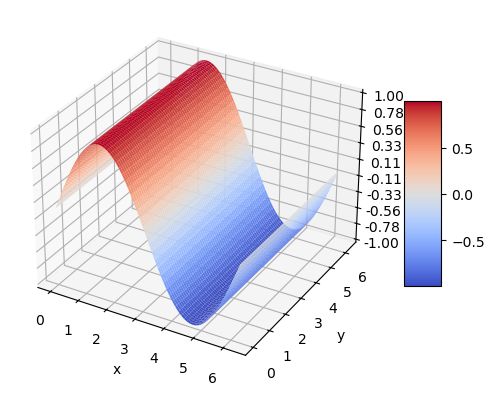

In [7]:
# Create a figure and a 3D axis
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Read data
file_path = '../data/data.txt'  # Replace with the actual file path
headers, data_blocks = read_data_file(file_path)

# Make data.
nx = data_blocks.shape[1] - 1
ny = data_blocks.shape[2] - 1

hx = 2*np.pi / nx
hy = 2*np.pi / ny

X = np.arange(0, 2*np.pi + hx, hx)
Y = np.arange(0, 2*np.pi + hy, hy)
X, Y = np.meshgrid(X, Y, indexing='ij')
Z = data_blocks[0]
# Z = np.sin(2*Y) + np.cos(2*Y)

# Plot the surface.

plot_args = {'rstride': 1, 'cstride': 1, 'cmap': cm.coolwarm, 'linewidth': 0.01, 'antialiased': True, 'color': 'w', 'shade': True}
surf = ax.plot_surface(X, Y, Z, **plot_args)


ax.set_xlabel('x')
ax.set_ylabel('y')

# Customize the z axis.
ax.set_zlabel('z')
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Animation update function
def update(frame):
    # Clear the previous frame
    ax.clear()

    # Update the arrays
    Z = data_blocks[frame]

    # Update the surface plot data
    surf.set_array(Z.ravel())
    return surf,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(data_blocks), interval=50)

# Show the animation
plt.show()

In [17]:
for i in range(len(headers)):
    print(np.max(np.abs(data_blocks[i]-data_blocks[0])))

0.0
9.638290000012246e-05
0.00026987200000012245
0.0004626380000001225
0.0006554040000001225
0.0008481700000001225
0.0010409400000001225
0.0012337000000001224
0.0014264700000001225
0.0016192400000001226
0.0018120100000001225
0.002004770000000122
0.0021975400000001223
0.0023903100000001224
0.0025830800000001225
0.002775850000000122
0.002968630000000122
0.0031614000000001223
0.0033541700000001224
0.0035469500000001224
0.0037397200000001225
0.0039325000000001225
0.0041252800000001226
0.004318060000000123
0.004510840000000123
0.004703620000000123
0.004896410000000123
